In [1]:
import pandas as pd
import numpy as ns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("wine-quality_dataset.csv")

In [4]:
df.head()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [5]:
X=df.drop("Quality_Category",axis=1)

In [6]:
y=df[["Quality_Category"]]

In [7]:
col=X.columns

<AxesSubplot:>

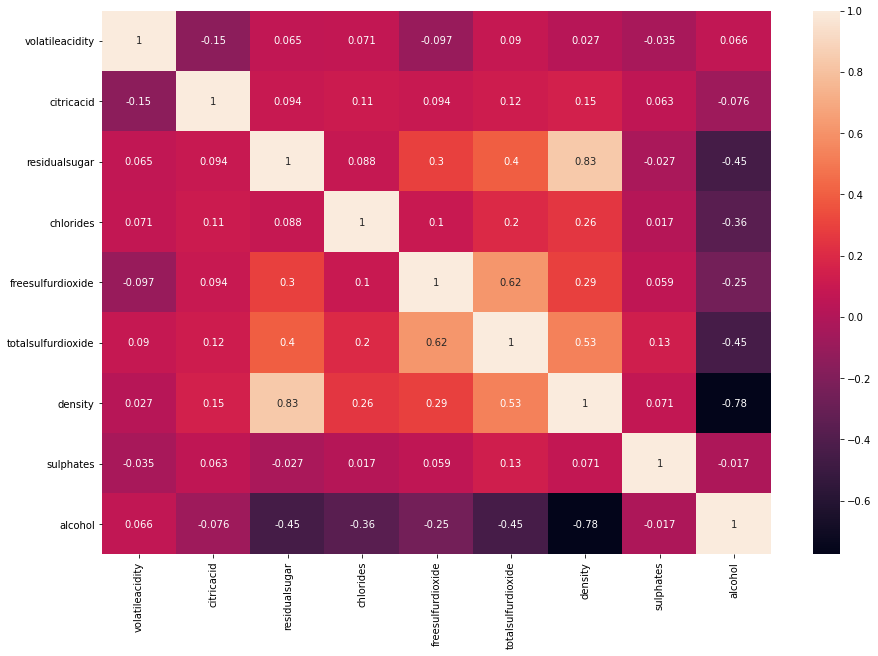

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
X=scaler.fit_transform(X)

In [14]:
X=pd.DataFrame(X,columns=col)

In [15]:
X.head()

,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0.214954,0.048367,-0.944866,0.147691,-1.252312,-0.149871,-0.016107,0.000841,-0.824525
1,-0.479557,-0.116875,0.415765,0.559542,0.686833,1.120898,0.649085,-0.787657,-0.499464
2,0.016522,0.544093,0.100257,0.193452,-0.312120,-0.973518,0.316489,-0.437213,-0.336933
3,0.413386,-1.438811,0.119976,-0.035354,-0.312120,-0.055740,0.316489,-0.174380,-0.743259
4,-0.082693,0.213609,2.821519,-0.035354,0.569309,0.744374,2.312065,-0.349602,-1.393381


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
X_train.shape,X_test.shape

((3915, 9), (979, 9))

### LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model=LogisticRegression()

In [21]:
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
model.score(X_test,y_test)

0.8028600612870276

In [23]:
parameters={"C":[0.01,0.1,1,2,5,10,25,50]}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
cv=GridSearchCV(model,parameters,cv=5)

In [26]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 2, 5, 10, 25, 50]})

In [27]:
cv.best_estimator_

LogisticRegression(C=0.01)

In [28]:
model=cv.best_estimator_

In [29]:
model.score(X_train,y_train)

0.797956577266922

In [30]:
model.score(X_test,y_test)

0.8140960163432074

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
y_predicted=model.predict(X_test)

In [33]:
accuracy_score(y_test,y_predicted)

0.8140960163432074

In [34]:
cnf=confusion_matrix(y_test,y_predicted)

In [35]:
cnf

array([[757,  29],
       [153,  40]], dtype=int64)

<AxesSubplot:>

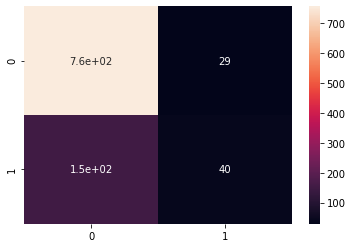

In [36]:
sns.heatmap(cnf,annot=True)

### RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model1=RandomForestClassifier()

In [39]:
model1.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
model1.score(X_train,y_train)

1.0

In [41]:
model1.score(X_test,y_test)

0.8764044943820225

In [45]:
parameters1={"n_estimators":[100,200,300,500,700,1000]}

In [46]:
cv1=GridSearchCV(model1,parameters1,cv=5)

In [47]:
cv1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 300, 500, 700, 1000]})

In [48]:
cv1.best_estimator_

RandomForestClassifier(n_estimators=1000)

In [49]:
model1=cv1.best_estimator_

In [50]:
model1.score(X_train,y_train)

1.0

In [51]:
model1.score(X_test,y_test)

0.8825331971399387

In [52]:
y_predicted1=model1.predict(X_test)

In [53]:
accuracy_score(y_test,y_predicted1)

0.8825331971399387

In [54]:
cnf1=confusion_matrix(y_test,y_predicted1)

In [55]:
cnf1

array([[744,  42],
       [ 73, 120]], dtype=int64)

<AxesSubplot:>

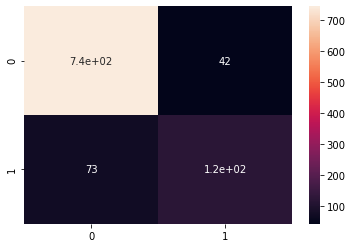

In [56]:
sns.heatmap(cnf1,annot=True)

### Descision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model2=DecisionTreeClassifier()

In [69]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
model2.score(X_train,y_train)

1.0

In [71]:
model2.score(X_test,y_test)

0.8437180796731358

In [72]:
y_predicted2=model2.predict(X_test)

In [73]:
accuracy_score(y_test,y_predicted2)

0.8437180796731358

In [74]:
cnf2=confusion_matrix(y_test,y_predicted2)

In [75]:
cnf2

array([[697,  89],
       [ 64, 129]], dtype=int64)

<AxesSubplot:>

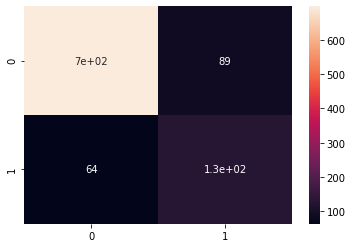

In [77]:
sns.heatmap(cnf2,annot=True)